In [62]:
import anndata
import numpy as np
import scanpy as sc
import pandas as pd

In [69]:
adata = anndata.read_h5ad('barcodes/counts_unfiltered/adata.h5ad')

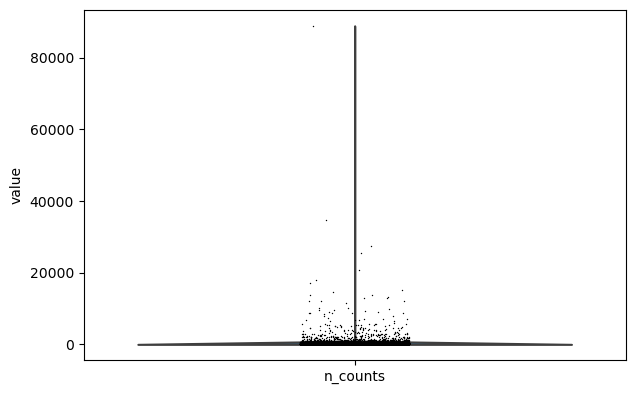

In [70]:
sc.pp.filter_cells(adata, min_counts=0)

sc.pl.violin(adata, keys='n_counts')

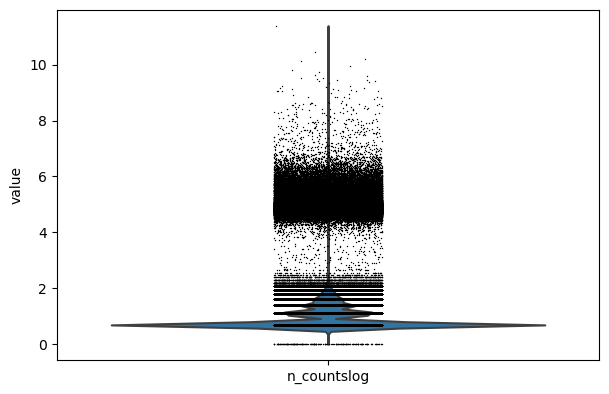

In [71]:
adata.obs['n_countslog'] = np.log1p(adata.obs['n_counts'])  # natural log
sc.pl.violin(adata, keys='n_countslog')

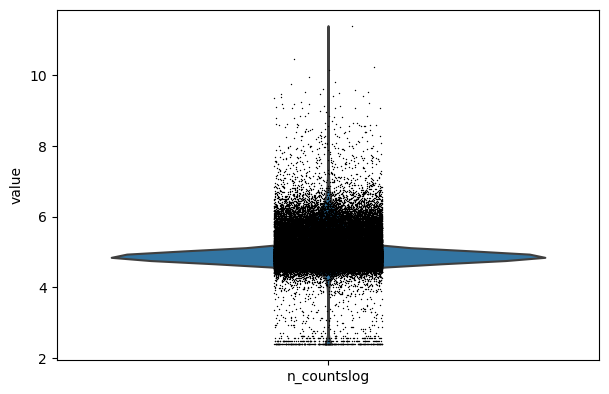

AnnData object with n_obs × n_vars = 81718 × 12
    obs: 'n_counts', 'n_countslog'
    var: 'feature_name'

In [72]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pl.violin(adata, keys='n_countslog', title="kallisto UMI counts")
adata

In [73]:
np.median(adata.obs["n_counts"])

136.0

In [74]:
adata.obs.sort_values(by="n_counts", ascending=False).head(10000).tail(50)

,n_counts,n_countslog
barcode,,
TGCGACGCAATCTGCA,247.0,5.513429
GTAATGCCACAGAGAC,247.0,5.513429
TATTCCATCGAGATGG,247.0,5.513429
ATAGACCGTATCAGCT,247.0,5.513429
TACAACGTCGCATTAG,247.0,5.513429
ATGCCTCTCTCTCTAA,247.0,5.513429
TGGATGTGTACAGCGA,247.0,5.513429
GGGCCATTCGCAGTCG,247.0,5.513429
TATTCCACATGAAGCG,247.0,5.513429


In [75]:
adata["ATCGGATAGCAACCAG",:].X.todense()

matrix([[  7.,   8.,   8.,  13.,   8.,  16.,   1.,   7.,  15.,   5.,
         149.,   7.]])

In [76]:
# pd.Dataframe(adata.raw.X).to_csv(filename_raw_x)
# adata.raw.obs.to_csv(filename_raw_obs)
# adata.raw.var.to_csv(filename_raw_var)
df = pd.DataFrame(adata.X.todense())
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,10.0,12.0,16.0,8.0,4.0,27.0,4.0,6.0,7.0,1.0,5.0,7.0
1,7.0,14.0,17.0,20.0,6.0,40.0,3.0,9.0,11.0,17.0,112.0,8.0
2,8.0,9.0,23.0,16.0,8.0,29.0,5.0,15.0,10.0,15.0,5.0,249.0
3,5.0,12.0,17.0,11.0,2.0,22.0,7.0,11.0,6.0,9.0,6.0,2.0
4,18.0,21.0,12.0,19.0,9.0,40.0,9.0,16.0,14.0,7.0,6.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81713,10.0,8.0,18.0,11.0,3.0,27.0,6.0,10.0,7.0,12.0,9.0,7.0
81714,12.0,10.0,12.0,10.0,5.0,166.0,6.0,9.0,21.0,121.0,1.0,14.0
81715,8.0,13.0,8.0,13.0,9.0,24.0,4.0,4.0,7.0,8.0,2.0,154.0
81716,5.0,12.0,9.0,18.0,2.0,21.0,5.0,10.0,10.0,8.0,9.0,239.0


In [77]:
df.index = adata.obs.index
df

,0,1,2,3,4,5,6,7,8,9,10,11
barcode,,,,,,,,,,,,
AAACCCAAGACAACTA,10.0,12.0,16.0,8.0,4.0,27.0,4.0,6.0,7.0,1.0,5.0,7.0
AAACCCAAGACAAGCC,7.0,14.0,17.0,20.0,6.0,40.0,3.0,9.0,11.0,17.0,112.0,8.0
AAACCCAAGACATCCT,8.0,9.0,23.0,16.0,8.0,29.0,5.0,15.0,10.0,15.0,5.0,249.0
AAACCCAAGACTGAGC,5.0,12.0,17.0,11.0,2.0,22.0,7.0,11.0,6.0,9.0,6.0,2.0
AAACCCAAGAGAGGTA,18.0,21.0,12.0,19.0,9.0,40.0,9.0,16.0,14.0,7.0,6.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCGGACTTA,10.0,8.0,18.0,11.0,3.0,27.0,6.0,10.0,7.0,12.0,9.0,7.0
TTTGTTGTCGTCTACC,12.0,10.0,12.0,10.0,5.0,166.0,6.0,9.0,21.0,121.0,1.0,14.0
TTTGTTGTCTATCCAT,8.0,13.0,8.0,13.0,9.0,24.0,4.0,4.0,7.0,8.0,2.0,154.0


In [78]:
df.to_csv("230414_bd391_multiseq_counts_per_cell.csv")